# Pokemon
**Proyect using pokemon data set** 

**Questions I want to answer:**
1) Whats the most common pokemon
2) What type of pokemon wins the most battles? What is the weakest against?
3) Whats the best rounded pokemon
4) Whats the pokemon that wins the most? Whats the weakest against?
5) If I where up agaisnt a team of 6 pokemon, whats the likelehood of its composition? What team should I have?
6) If I where to play pokemon, which type of pokemon should I start with?

**Structure**
1) explore data 2) visualize data 3) conclusions

**Libaries I will be using**

In [186]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns

In [243]:
pokemon=pd.read_csv('pokemon.csv')
combat=pd.read_csv('combats.csv')

**Load data sets**
1) explore data

**Pokemon data set**

In [21]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [31]:
pokemon.shape

(800, 12)

In [34]:
pd.value_counts(pokemon.dtypes)

int64     8
object    3
bool      1
dtype: int64

In [43]:
pokemon.sample(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False
283,284,Mega Swampert,Water,Ground,100,150,110,95,110,70,3,False
168,169,Meganium,Grass,NaN,80,82,100,83,100,80,2,False
660,661,Klink,Steel,NaN,40,55,70,45,60,30,5,False
196,197,Mega Ampharos,Electric,Dragon,90,95,105,165,110,45,2,False


In [45]:
# Display non-numerical features
pokemon.select_dtypes(exclude="number").head()

,Name,Type 1,Type 2,Legendary
0,Bulbasaur,Grass,Poison,False
1,Ivysaur,Grass,Poison,False
2,Venusaur,Grass,Poison,False
3,Mega Venusaur,Grass,Poison,False
4,Charmander,Fire,NaN,False


In [ ]:
# All non-numerical features are properly marked, no errors here

In [48]:
# Macro summary of non-numerical features
pokemon.describe(exclude="number")

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Bulbasaur,Water,Flying,False
freq,1,112,97,735


In [211]:
# Macro summary of numerical features
# pokemon.describe(include="number", percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<AxesSubplot:title={'center':'Unique values per column/feature'}>

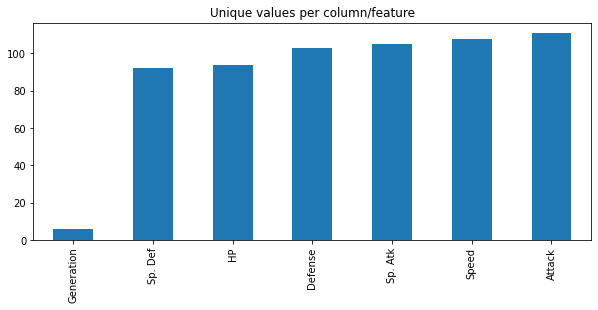

In [69]:
# Number of unique values per column/feature for numerical data types
unique_values=pokemon.drop(["#"],axis=1).select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(figsize=(10,4), title="Unique values per column/feature")

In [75]:
# Detecting duplicates
n_duplicates=pokemon.drop(["#"],axis=1).duplicated().sum()
print("The pokemon data set has "+str(n_duplicates)+" duplicates")

The pokemon data set has 0 duplicates


<AxesSubplot:>

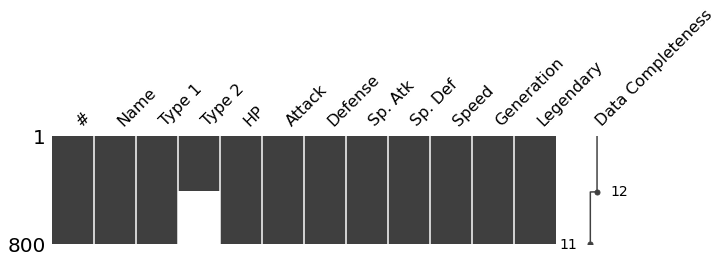

In [267]:
# Detecting missing values in data set
# plt.figure(figsize=(5, 5))
# plt.imshow(pokemon.isna(), aspect="auto", interpolation="nearest", cmap="gray")
# plt.xlabel("Column Number")
# plt.ylabel("Sample Number")

# Shorter way to visualize missing values
msno.matrix(pokemon, labels=True, sort="descending",figsize=(10, 2))

In [169]:
# percentage of missing values in each column
pokemon.isna().mean()

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

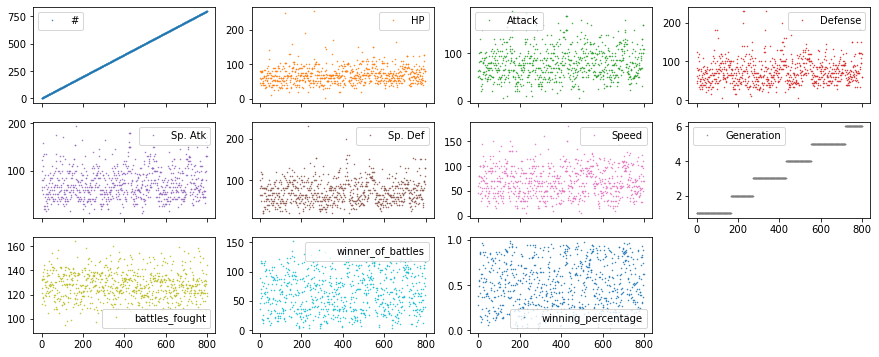

In [348]:
pokemon.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(15, 6), markersize=1)

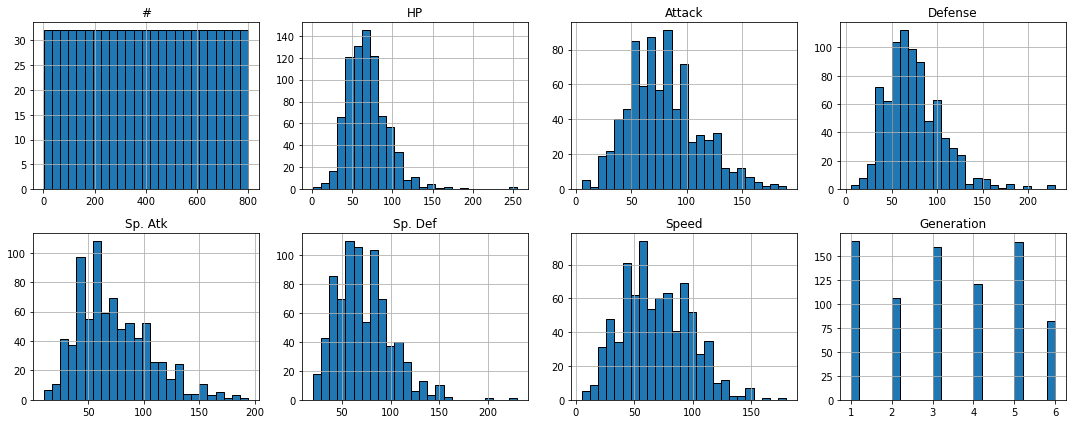

In [180]:
pokemon.hist(bins=25, figsize=(15, 6), layout=(-1, 4), edgecolor="black")
plt.tight_layout()

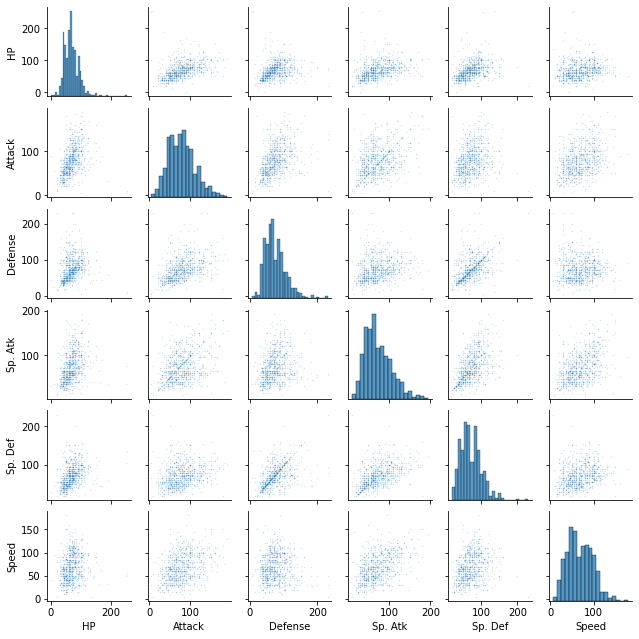

In [194]:
sns.pairplot(pokemon.drop(["#","Legendary", "Generation"], axis=1), height=1.5, plot_kws={"s": 2, "alpha": 0.2})

In [203]:
pokemon_corr=pokemon.drop(["#","Generation","Legendary"],axis=1).corr()
pokemon_corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


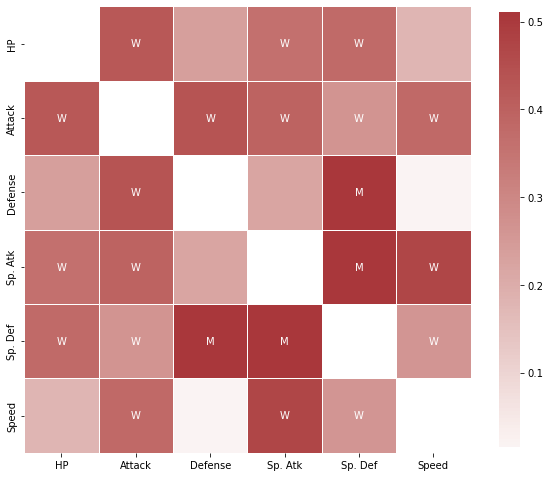

In [210]:
# Create labels for the correlation matrix
labels = np.where(np.abs(pokemon_corr)>0.75, "S",
                  np.where(np.abs(pokemon_corr)>0.5, "M",
                           np.where(np.abs(pokemon_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(pokemon_corr, mask=np.eye(len(pokemon_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

**Pokemon combat information data set**

In [22]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [33]:
combat.shape

(50000, 3)

In [35]:
pd.value_counts(combat.dtypes)

int64    3
dtype: int64

In [44]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


**Modify data sets in order to be able to have all the data to answerd to questions asked**

In [244]:
# Modify combat data set to include types
combat=combat.merge(pokemon[["#","Type 1"]], left_on="First_pokemon", right_on="#", how="left").drop(columns="#").rename(columns={"Type 1":"First_pokemon_type"})

In [248]:
combat=combat.merge(pokemon[["#","Type 1"]], left_on="Second_pokemon", right_on="#", how="left").drop(columns="#").rename(columns={"Type 1":"Second_pokemon_type"})

In [253]:
combat=combat.merge(pokemon[["#","Type 1"]], left_on="Winner", right_on="#", how="left").drop(columns="#").rename(columns={"Type 1":"Winner_pokemon_type"})

In [261]:
# Combat data set has initial changes with combat information and types
print(combat.shape)
combat.sample(5)

(50000, 6)


,First_pokemon,Second_pokemon,Winner,First_pokemon_type,Second_pokemon_type,Winner_pokemon_type
35756,483,317,483,Poison,Bug,Poison
29124,690,616,616,Normal,Fire,Fire
7316,118,756,756,Poison,Fairy,Fairy
36721,515,573,573,Normal,Fire,Fire
39795,6,170,6,Fire,Fire,Fire


In [321]:
# Mechanism to check if merge was done correctly
combat.loc[(combat["First_pokemon"]==1)|(combat["Second_pokemon"]==1)]

,First_pokemon,Second_pokemon,Winner,First_pokemon_type,Second_pokemon_type,Winner_pokemon_type
426,1,679,679,Grass,Bug,Bug
442,732,1,732,Fire,Grass,Fire
480,441,1,441,Water,Grass,Water
995,1,687,687,Grass,Dark,Dark
1040,1,557,557,Grass,Grass,Grass
...,...,...,...,...,...,...
48539,733,1,1,Bug,Grass,Grass
48696,1,217,217,Grass,Psychic,Psychic
48716,1,346,1,Grass,Poison,Grass
48741,522,1,522,Grass,Grass,Grass


In [282]:
# Verifying if combat information has duplicates
# combat.duplicated()
# combat.loc[(combat["First_pokemon"]==303)&(combat["Second_pokemon"]==368)]
print(str(combat.duplicated().sum())+" duplicates will remain in order to simulate battle combinations possibility")

1952 duplicates will remain in order to simulate battle combinations possibility


In [316]:
# All battles that any pokemon fought
all_battles=pd.concat([combat["First_pokemon"],combat["Second_pokemon"]],ignore_index=True).to_frame(name="all_pokemon_battles")
all_battles=all_battles.groupby(by=["all_pokemon_battles"]).agg({"all_pokemon_battles":"count"}).rename(columns={"all_pokemon_battles":"battles_fought"})
all_battles=all_battles.rename_axis("pokemon_id")
all_battles

,battles_fought
pokemon_id,
1,133
2,121
3,132
4,125
5,112
...,...
796,105
797,131
798,119


In [330]:
# All battles that any pokemon won
winner_battles=combat.groupby(by=["Winner"]).agg({"Winner":"count"}).rename(columns={"Winner":"winner_of_battles"})
winner_battles=winner_battles.rename_axis("pokemon_id")
winner_battles

,winner_of_battles
pokemon_id,
1,37
2,46
3,89
4,70
5,55
...,...
796,39
797,116
798,60


In [336]:
# Join both df to obtain winner percentage
pokemon_w_perc=all_battles.merge(winner_battles, on="pokemon_id", how="outer")
pokemon_w_perc["winning_percentage"]=pokemon_w_perc["winner_of_battles"]/pokemon_w_perc["battles_fought"]
pokemon_w_perc

,battles_fought,winner_of_battles,winning_percentage
pokemon_id,,,
1,133,37.0,0.278195
2,121,46.0,0.380165
3,132,89.0,0.674242
4,125,70.0,0.560000
5,112,55.0,0.491071
...,...,...,...
796,105,39.0,0.371429
797,131,116.0,0.885496
798,119,60.0,0.504202


In [341]:
# Merge data sets to obtain pokemon winning percentage
pokemon=pokemon.merge(pokemon_w_perc, left_on="#", right_on="pokemon_id", how="left")

In [361]:
# Check data set for pokemon with missing information
pokemon.loc[pokemon.isna()["winning_percentage"]==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,battles_fought,winner_of_battles,winning_percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,135.0,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN


In [367]:
# Drop all na that didnt fight in any battles
pokemon=pokemon.dropna(subset=["battles_fought"])
pokemon.loc[pokemon.isna()["winning_percentage"]==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,battles_fought,winner_of_battles,winning_percentage
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,135.0,NaN,NaN


In [373]:
# Replace na information of only de needed columns with proper one, in this case 0
pokemon=pokemon.fillna({"winner_of_battles":0,"winning_percentage":0})
print(pokemon.isna().mean())
print(pokemon.shape)

#                     0.000000
Name                  0.000000
Type 1                0.000000
Type 2                0.482143
HP                    0.000000
Attack                0.000000
Defense               0.000000
Sp. Atk               0.000000
Sp. Def               0.000000
Speed                 0.000000
Generation            0.000000
Legendary             0.000000
battles_fought        0.000000
winner_of_battles     0.000000
winning_percentage    0.000000
dtype: float64
(784, 15)


In [376]:
# Add columns of total stats
pokemon["Total_stats"]=pokemon.iloc[:,4:10].sum(axis=1)
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,battles_fought,winner_of_battles,winning_percentage,Total_stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,133.0,37.0,0.278195,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,121.0,46.0,0.380165,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,132.0,89.0,0.674242,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,125.0,70.0,0.560000,625
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,112.0,55.0,0.491071,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,105.0,39.0,0.371429,600
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,131.0,116.0,0.885496,700
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,119.0,60.0,0.504202,600
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,144.0,89.0,0.618056,680


In [382]:
# Correlation to see if theres any relationship between variables
pokemon_corr=pokemon.drop(columns=["#","Generation","Legendary","battles_fought","winner_of_battles"]).corr()
pokemon_corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,winning_percentage,Total_stats
HP,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.261602,0.623055
Attack,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.502825,0.738463
Defense,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.114565,0.613297
Sp. Atk,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.481445,0.746173
Sp. Def,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.302422,0.715782
Speed,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,0.938055,0.576841
winning_percentage,0.261602,0.502825,0.114565,0.481445,0.302422,0.938055,1.000000,0.650052
Total_stats,0.623055,0.738463,0.613297,0.746173,0.715782,0.576841,0.650052,1.000000


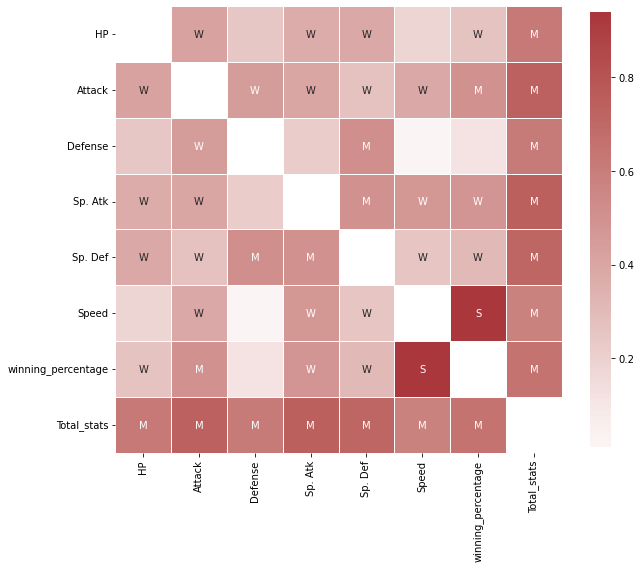

In [383]:
# Create labels for the correlation matrix
labels = np.where(np.abs(pokemon_corr)>0.75, "S",
                  np.where(np.abs(pokemon_corr)>0.5, "M",
                           np.where(np.abs(pokemon_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(pokemon_corr, mask=np.eye(len(pokemon_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [399]:
# Winning percentage per type
combat.groupby(by=["First_pokemon_type","Second_pokemon_type"], as_index=False).agg({"Winner_pokemon_type":"count"})


,First_pokemon_type,Second_pokemon_type,Winner_pokemon_type
0,Bug,Bug,386
1,Bug,Dark,166
2,Bug,Dragon,166
3,Bug,Electric,228
4,Bug,Fairy,94
...,...,...,...
319,Water,Poison,256
320,Water,Psychic,516
321,Water,Rock,364
322,Water,Steel,234


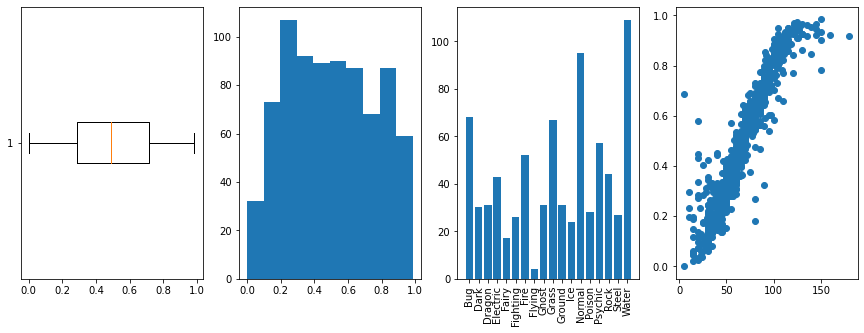

In [540]:
# Subplot - para crear varias graficas en una linea de cogido, funciona con (filas, columns, indice) solo debo especificar
# donde estoy trabajando

a=pokemon["winning_percentage"]
b=pokemon["Type 1"]
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.boxplot(a, vert=False)
plt.subplot(1,4,2)
plt.hist(a)
plt.subplot(1,4,3)
c=pokemon.groupby(by=["Type 1"], as_index=False).agg({"#":"count"})
plt.bar(c["Type 1"],c["#"])
plt.xticks(rotation=90)
plt.subplot(1,4,4)
plt.scatter(pokemon["Speed"],a)
fig.tight_layout()
plt.show()

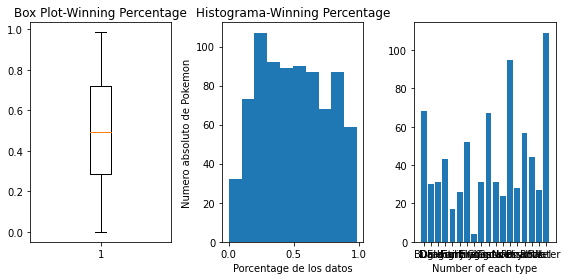

In [534]:
c=pokemon.groupby(by=["Type 1"], as_index=False).agg({"#":"count"})
fig, axes= plt.subplots(1,3,figsize=(8,4))
axes[0].boxplot(a)
axes[0].set_title("Box Plot-Winning Percentage")
axes[1].hist(a)
axes[1].set_title("Histograma-Winning Percentage")
axes[1].set_xlabel("Porcentage de los datos")
axes[1].set_ylabel("Numero absoluto de Pokemon")
axes[2].bar(c["Type 1"],c["#"])
axes[2].set_xlabel("Number of each type")
fig.tight_layout()
plt.show()

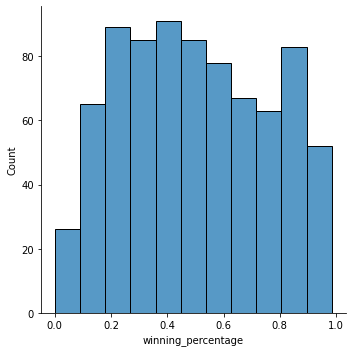

In [549]:
sns.displot(data=pokemon, x='winning_percentage')
plt.show()

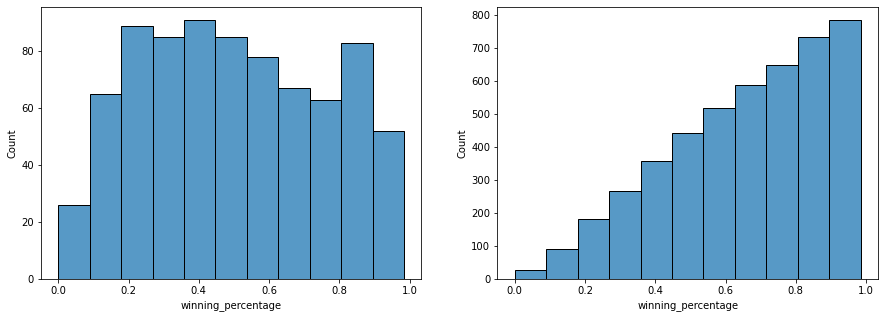

In [556]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=pokemon, x='winning_percentage')
plt.subplot(1,2,2)
sns.histplot(data=pokemon, x='winning_percentage', cumulative=True)
fig.tight_layout()
plt.show()

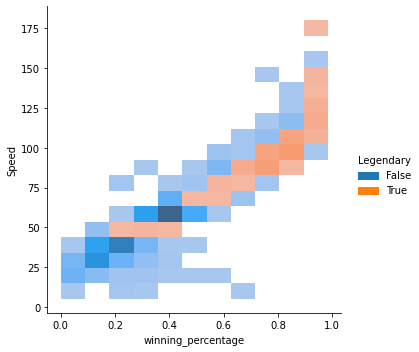

In [586]:
sns.displot(data=pokemon, x='winning_percentage', y='Speed', hue='Legendary')
plt.show()

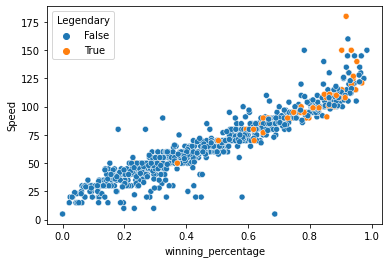

In [583]:
sns.scatterplot(data=pokemon, x='winning_percentage', y='Speed', hue='Legendary')
plt.show()

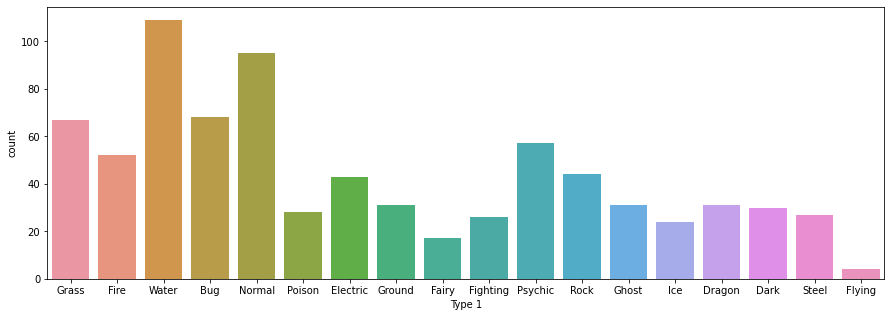

In [571]:
plt.figure(figsize=(15,5))
sns.countplot(data=pokemon, x='Type 1')
plt.show()

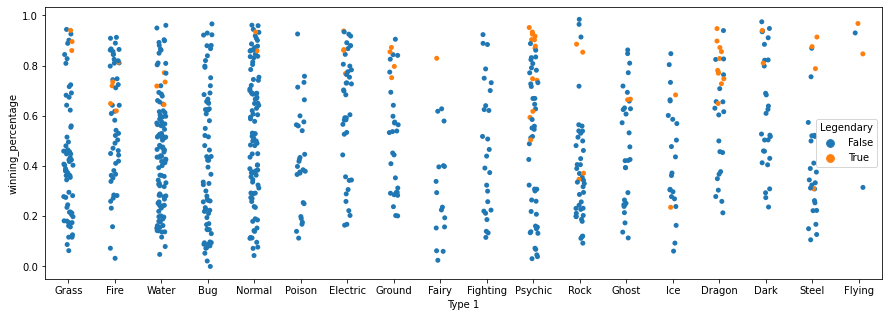

In [578]:
plt.figure(figsize=(15,5))
sns.stripplot(data=pokemon, x='Type 1', y='winning_percentage', hue='Legendary')
plt.show()